<a href="https://colab.research.google.com/github/loguansiang/fyp/blob/main/lstm_window_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras import optimizers
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, Dropout
from keras import optimizers
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [11]:
url = 'https://raw.githubusercontent.com/loguansiang/fyp/main/SAND%20fyp.csv'
df = pd.read_csv(url)

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace = True)

In [13]:
df = df['Close']


In [14]:
df

Date
2020-08-14    0.065645
2020-08-15    0.050964
2020-08-16    0.060847
2020-08-17    0.053999
2020-08-18    0.051700
                ...   
2022-04-13    2.869923
2022-04-14    2.780882
2022-04-15    2.803639
2022-04-16    2.822680
2022-04-17    2.790278
Name: Close, Length: 612, dtype: float64

In [15]:
array = df.values.reshape(df.shape[0],1)
scaler = MinMaxScaler()
array = scaler.fit_transform(array)

In [16]:
train_size = int(len(array) * 0.67)
test_size = len(array) - train_size
train, test = array[0:train_size,:], array[train_size:len(array),:]
print(len(train), len(test))

410 202


In [17]:
def create_dataset(dataset, look_back):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)
 

In [18]:
# reshape into X=t and Y=t+1
numpy.random.seed(42)
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [19]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back,1 )))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)
model.summary

Epoch 1/50
402/402 - 5s - loss: 3.4098e-04 - 5s/epoch - 12ms/step
Epoch 2/50
402/402 - 1s - loss: 7.3705e-05 - 968ms/epoch - 2ms/step
Epoch 3/50
402/402 - 1s - loss: 6.7066e-05 - 1s/epoch - 3ms/step
Epoch 4/50
402/402 - 1s - loss: 7.2321e-05 - 1s/epoch - 4ms/step
Epoch 5/50
402/402 - 2s - loss: 6.7549e-05 - 2s/epoch - 4ms/step
Epoch 6/50
402/402 - 2s - loss: 6.0416e-05 - 2s/epoch - 4ms/step
Epoch 7/50
402/402 - 2s - loss: 6.3238e-05 - 2s/epoch - 4ms/step
Epoch 8/50
402/402 - 2s - loss: 5.8805e-05 - 2s/epoch - 4ms/step
Epoch 9/50
402/402 - 2s - loss: 6.1089e-05 - 2s/epoch - 4ms/step
Epoch 10/50
402/402 - 1s - loss: 5.3646e-05 - 939ms/epoch - 2ms/step
Epoch 11/50
402/402 - 1s - loss: 5.0371e-05 - 979ms/epoch - 2ms/step
Epoch 12/50
402/402 - 1s - loss: 5.1912e-05 - 928ms/epoch - 2ms/step
Epoch 13/50
402/402 - 1s - loss: 4.9834e-05 - 920ms/epoch - 2ms/step
Epoch 14/50
402/402 - 1s - loss: 4.9570e-05 - 916ms/epoch - 2ms/step
Epoch 15/50
402/402 - 1s - loss: 4.5712e-05 - 914ms/epoch - 2ms/st

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f4a0342d990>>

In [20]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.04 RMSE
Test Score: 0.72 RMSE


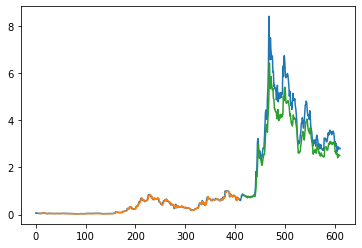

In [21]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(array)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(array)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(array)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(array))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()